In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('2019.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
happines_data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [3]:
X = happines_data[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = happines_data['Score']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=0,
                                     n_estimators=14,
                                     max_depth=3.25,
                                     n_jobs=-1,
                                     min_samples_leaf=0.14,
                                     max_features=4,
                                     min_samples_split=0.3)
forest_model.fit(X_train, y_train)

forest_model.score(X_test, y_test)

0.7611909554044621

In [6]:
sorted(zip(forest_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.6148695557677598, 'Social support'),
 (0.1928831061522343, 'Healthy life expectancy'),
 (0.12060703160954692, 'GDP per capita'),
 (0.04715666231870504, 'Perceptions of corruption'),
 (0.015797641104586646, 'Freedom to make life choices'),
 (0.008686003047167375, 'Generosity')]

In [10]:
for i in range(1,7,1):
    forest_model = RandomForestRegressor(random_state=0,
                                         n_estimators=14,
                                         max_depth=3.25,
                                         n_jobs=-1,
                                         min_samples_leaf=0.14,
                                         max_features=i,
                                         min_samples_split=0.3)
    forest_model.fit(X_train, y_train)

    print(str(i)+" - "+str(forest_model.score(X_test, y_test)))

1 - 0.42855999046784293
2 - 0.6470283384060227
3 - 0.6922789475155257
4 - 0.7611909554044621
5 - 0.7585868735598638
6 - 0.7588091644622625


In [500]:
from sklearn import metrics

pred = forest_model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.41329772825993955
Mean Squared Error: 0.23111005755052288
Root Mean Squared Error: 0.48073907429136953


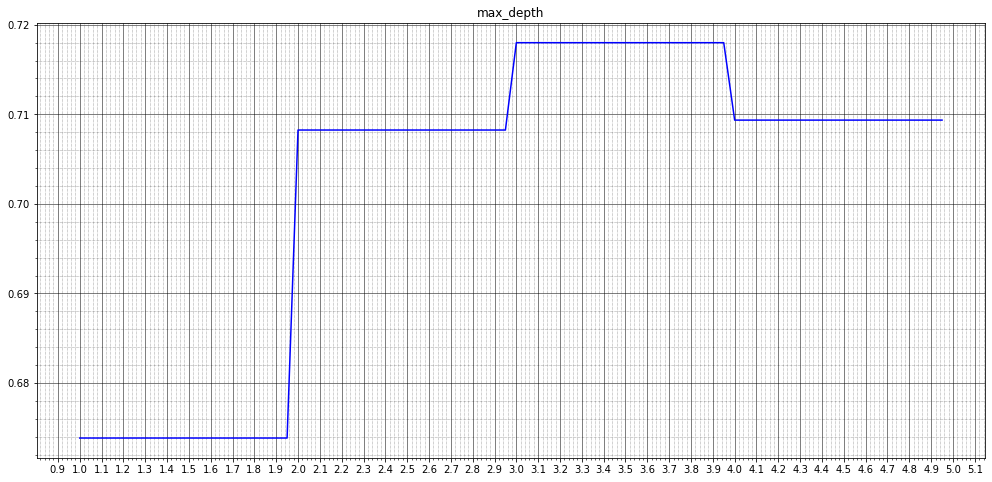

In [12]:
max_depths = np.arange(1, 5, 0.05)
results = []

for feature in max_depths:
    rf = RandomForestRegressor(random_state=0, max_depth=feature, n_jobs=-1)
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(max_depths, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('max_depth')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))

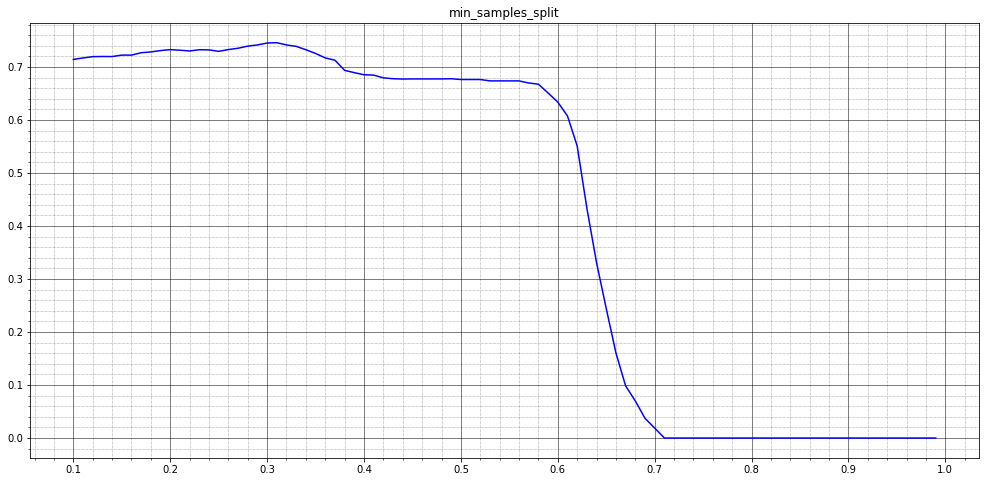

In [13]:
min_samples_splits = np.arange(0.1, 1, 0.01)
results = []

for feature in min_samples_splits:
    rf = RandomForestRegressor(random_state=0, min_samples_split=feature, n_jobs=-1)
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(min_samples_splits, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('min_samples_split')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))

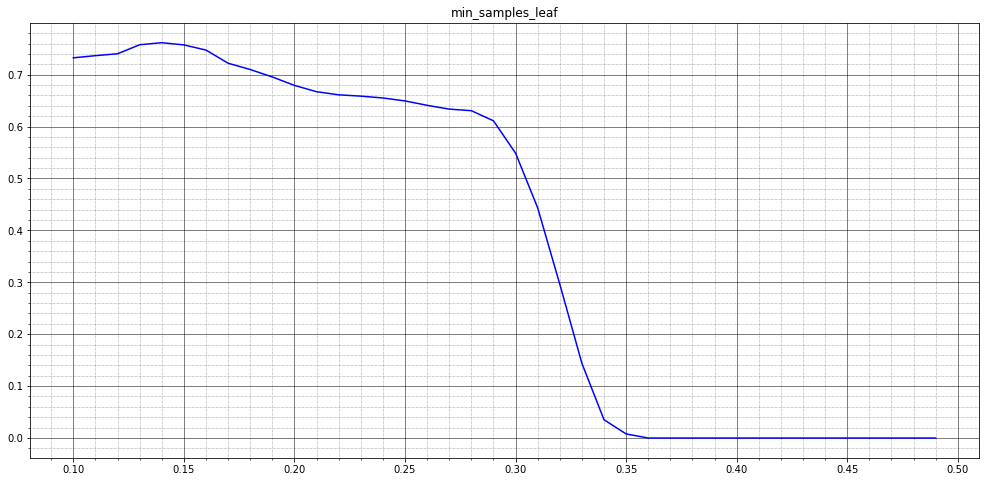

In [505]:
min_samples_leafs = np.arange(0.1, 0.5, 0.01)
results = []

for feature in min_samples_leafs:
    rf = RandomForestRegressor(random_state=0, min_samples_leaf=feature, n_jobs=-1)
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(min_samples_leafs, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('min_samples_leaf')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.05))

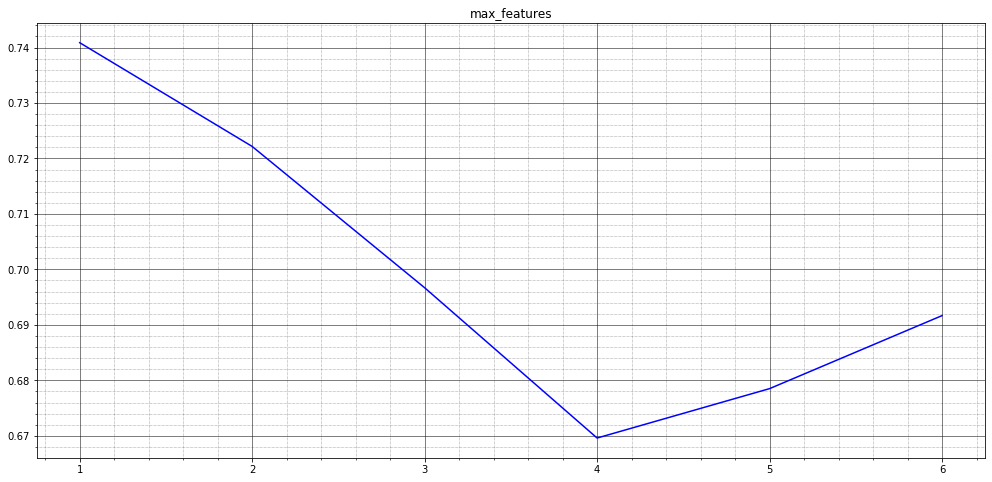

In [14]:
max_features  = list(range(1,X.shape[1]+1))
results = []

for feature in max_features :
    rf = RandomForestRegressor(random_state=0, max_features=feature, n_jobs=-1)
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(max_features, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('max_features')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))